In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from matplotlib import transforms, pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
GRAY4, GRAY7 = '#646369', '#929497'

In [2]:
df = pd.read_csv("~/Desktop/controlHigh.csv")
ar = df.values
arT = ar.T
toBeDelete = []
for i in range(2,arT.shape[0]):
    tmp = arT[i]
    count = 0
    for j in range(arT.shape[1]):
        if tmp[j] < 1e-6:
            count = count + 1
    if count > (arT.shape[1]-2):
        print(i, count)
        toBeDelete.append(i)
df.drop(df.columns[toBeDelete], axis=1, inplace=True)

2 38
24 38
25 37
40 37
45 37
65 38
68 38
69 38
70 37
71 37
73 37
75 38


In [3]:
df['Risk'] = pd.get_dummies(df['Risk'])['Control']
features = df.columns.values.tolist()
features.remove('Risk')
features.remove('Sample Name')
target = 'Risk'
df[features + [target]]

,GSSG,8-OH-dG,GSH,L-Leucine,L-Kynurenine,L-Tryptophan,5-HTP,Cholic acid,N-phenylacetylglycine,5-HT,...,Glutamic26,Glycine49,PE(36:4),glutamine,betaine,histidine,pyroglutamic acid,N6-acetyl lysine,nicotinamide,Risk
0,0.00000,1.4100,0.00933,321.0,1.480,14.20,0.04980,0.00000,0.1800,0.983,...,0.671,0.23200,2.98,0.00000,91.4,0.02660,0.00,40.70,0.00000,1
1,0.00000,1.5900,0.00714,397.0,1.210,13.20,0.02430,0.00636,0.1750,0.723,...,1.030,0.01790,3.31,0.04290,109.0,0.07510,0.00,13.40,0.00000,1
2,0.00000,2.0800,0.00810,617.0,1.890,14.60,0.03160,0.01100,0.6010,0.629,...,1.510,0.00000,3.57,0.03240,65.0,0.18600,0.00,19.30,0.04880,1
3,0.00000,1.3700,0.01260,426.0,1.410,12.10,0.05200,0.00888,0.3120,1.250,...,0.857,0.00000,3.92,0.02840,75.6,0.13200,0.00,16.80,0.00669,1
4,0.00000,0.8250,0.00658,588.0,2.490,23.20,0.05410,0.04940,0.1650,1.470,...,2.250,0.03720,4.06,0.00000,134.0,0.09860,0.00,20.00,0.01730,1
5,0.00746,0.4280,0.00746,451.0,1.900,15.90,0.06720,0.00997,0.3070,1.070,...,1.320,0.00746,4.00,0.02610,75.8,0.08950,0.00,16.60,0.00000,1
6,0.00000,1.1500,0.01720,334.0,1.240,15.60,0.08580,0.01330,0.3000,0.827,...,1.010,0.04120,3.75,0.00000,78.4,0.07860,0.00,19.10,0.00000,1
7,0.00000,0.6580,0.02430,399.0,0.975,12.70,0.04760,0.00899,0.9330,0.600,...,1.040,0.01390,2.80,0.03470,73.4,0.08660,0.00,16.40,0.02900,1
8,0.00000,2.0900,0.01370,476.0,1.400,11.00,0.02390,0.01980,0.1560,0.450,...,1.320,0.00000,3.96,0.03760,65.7,0.10700,0.00,16.20,0.00000,1
9,0.00000,0.8100,0.00848,313.0,1.300,13.00,0.04360,0.00628,0.1770,0.454,...,1.090,0.00000,3.06,0.03490,59.5,0.08220,0.00,12.90,0.02380,1


In [4]:
# features.remove('L-Tryptophan')
# features.remove('Hippuric acid')
# features.remove('Glutamic')

In [5]:
X, y = df[features].values, df[target].values

In [6]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df[features], df[[target]], test_size=0.2, stratify=df[[target]])

# print ("number of training samples: ", len(X_train))
# print ("number of test samples: ", len(y_test))

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5000, 
                               random_state=507, 
                               max_features = 'sqrt',
                               )

model.fit(X, y.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=507,
                       verbose=0, warm_start=False)

In [8]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {(np.mean(n_nodes))}')
print(f'Average maximum depth {(np.mean(max_depths))}')

Average number of nodes 3.9336
Average maximum depth 1.4278


In [9]:
fi = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)


In [10]:
fi.head(60)

,feature,importance
30,Glutamic,0.086557
5,L-Tryptophan,0.084514
17,Hippuric acid,0.083488
59,histidine,0.068075
19,Ascorbic acid,0.056597
53,Hexanoylcarnitine,0.055935
1,8-OH-dG,0.054746
49,LPC(20:1),0.049604
24,Cl-Tyr,0.049424
54,Glutamic26,0.046558


In [11]:
fi.head(60)

,feature,importance
30,Glutamic,0.086557
5,L-Tryptophan,0.084514
17,Hippuric acid,0.083488
59,histidine,0.068075
19,Ascorbic acid,0.056597
53,Hexanoylcarnitine,0.055935
1,8-OH-dG,0.054746
49,LPC(20:1),0.049604
24,Cl-Tyr,0.049424
54,Glutamic26,0.046558


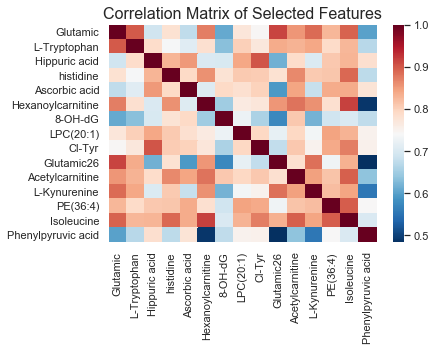

In [12]:
selected = fi.head(15)
corr_numeric = df[selected.values.T[0]].corr()
sns.set(font_scale=1)
sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix of Selected Features", fontsize=16,)

plt.show() 

In [13]:
sum(fi.values.T[1])

1.0

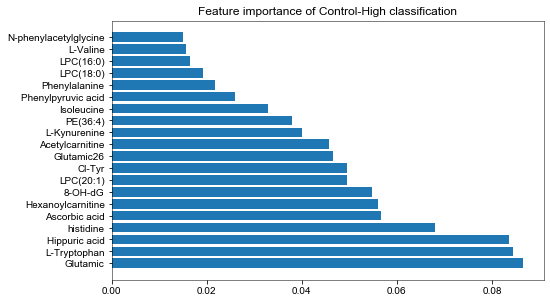

In [10]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    plt.figure(figsize=(8, 4.5))
    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.title('Feature importance of Control-High classification')
    plt.subplots_adjust(left=0.2, bottom=0.1, right=0.95, top=0.9, wspace=0, hspace=0)
    plt.yticks(range(top), names[::-1][0:top], fontsize=10)
    plt.savefig("ControlHighImportance.pdf")
    plt.show()
f_importances(fi.values.T[1], fi.values.T[0], 20)

In [12]:
fi.values.T[0]

array(['Glutamic', 'L-Tryptophan', 'Hippuric acid', 'histidine',
       'Ascorbic acid', 'Hexanoylcarnitine', '8-OH-dG', 'LPC(20:1)',
       'Cl-Tyr', 'Glutamic26', 'Acetylcarnitine', 'L-Kynurenine',
       'PE(36:4)', 'Isoleucine', 'Phenylpyruvic acid', 'Phenylalanine',
       'LPC(18:0)', 'LPC(16:0)', 'L-Valine', 'N-phenylacetylglycine',
       'C18:1LPC', 'Proline', 'betaine', '5-HTP', 'L-Leucine',
       'Glucosamine-6-phosphate', 'Glycochenodeoxycholic acid', '5-HT',
       'Alanine', 'Creatine', 'Glycine', 'pyroglutamic acid', 'glutamine',
       'Aminohippuric acid', 'GSH', 'Choline', 'N-Tyr',
       'N6-acetyl lysine', 'Trigonelline', 'Taurine', 'Inosine',
       'Palmitoyl-L-carnitine', 'LPC(22:6)', '2-DG', 'Serine',
       'Spermidine', '4,6-dihydroxyquinoline', 'L-Glutamic acid', 'GSSG',
       'p-Tyr', 'Xanthosine', 'Adenosine', 'Carnitine', 'Cholic acid',
       'C16:1LPC', 'SAM', 'Creatinine', 'm-Tyr', 'o-Tyr', 'Glycine49',
       'nicotinamide', 'Hypoxanthine', 'Opht A']

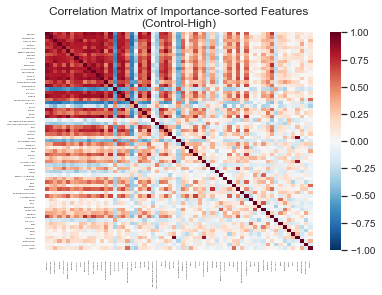

In [17]:


corr_numeric = df[fi.values.T[0]].corr()
sns.set(font_scale=0.2)
ax = sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r", vmin=-1, vmax=1)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.title("Correlation Matrix of Importance-sorted Features\n(Control-High)", fontsize=12)

plt.savefig("CorrMatCH.pdf")
plt.show() 